In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
x = [1,1, 10, 10]
y = [1,5, 1, 5]


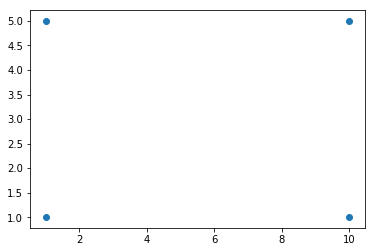

In [3]:
df = pd.DataFrame(list(zip(x,y)), columns=['x', 'y'])
plt.scatter(df.x, df.y)
plt.show()

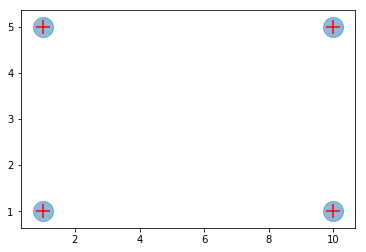

In [4]:
#4

df = pd.DataFrame(list(zip(x,y)), columns=['x', 'y'])
centroid = df.sample(4).reset_index(drop=True)
centroid_hold = centroid.copy()
plt.scatter(df.x, df.y, s=400, alpha=.5)
plt.scatter(centroid.x, centroid.y, s=200,  c='r', marker='+')

plt.show()   

while True :
    df['dist1'] = np.sqrt(np.square(centroid.loc[0].x - df.x) + np.square(centroid.loc[0].y - df.y))
    df['dist2'] = np.sqrt(np.square(centroid.loc[1].x - df.x) + np.square(centroid.loc[1].y - df.y))
    df['dist3'] = np.sqrt(np.square(centroid.loc[2].x - df.x) + np.square(centroid.loc[2].y - df.y))
    df['dist4'] = np.sqrt(np.square(centroid.loc[3].x - df.x) + np.square(centroid.loc[3].y - df.y))
    df['grp'] = df[['dist1', 'dist2', 'dist3', 'dist4']].idxmin( axis=1)
    centroid =  df.groupby('grp')[['x', 'y']].mean().reset_index(drop=True)
    if centroid.equals(centroid_hold) :
        break
    centroid_hold = centroid.copy()
    plt.scatter(df.x, df.y, c=df.grp.str[4:].astype(int), s=400)
    plt.scatter(centroid.x, centroid.loc[0].y, s=200,  c='r', marker='+')
    
    plt.show()







In [5]:
df

,x,y,dist1,dist2,dist3,dist4,grp
0,1,1,0.000000,9.000000,4.000000,9.848858,dist1
1,1,5,4.000000,9.848858,0.000000,9.000000,dist3
2,10,1,9.000000,0.000000,9.848858,4.000000,dist2
3,10,5,9.848858,4.000000,9.000000,0.000000,dist4
